<a href="https://colab.research.google.com/github/PomesHouse/SkillTreePython-DeepLearning/blob/main/02.%EC%BC%80%EB%9D%BC%EC%8A%A4_%EC%B0%BD%EC%8B%9C%EC%9E%90%EC%97%90%EA%B2%8C_%EB%B0%B0%EC%9A%B0%EB%8A%94_%EB%94%A5%EB%9F%AC%EB%8B%9D/7_1__Advanced_tools_for_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7. 딥러닝을 위한 고급 도구
* 함수형 API를 사용한 다양한 모델: 다중입력, 다중 출력
* 만들어진(구현된) 모델 가져오기
* 구현된 모델 가져와서 더 쌓아가기 
* 훈련 도중(.fit)에 훈련 과정을 조정하는 법 
* 텐서보드  사용 
* 실습: 인물 사진에서 성별과 표정 맞추기 

## 7.1  케라스의 함수형 API

### 7.1.1 함수형 API 소개

In [ ]:
x = layers.Input(shape = (100))
y = layers.Dense(1000, activation = 'relu')(x)
y = layers.Dense(10)(y)

### 7.1.2 다중 입력 모델
* 여러개의 인풋

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models, utils

def build_multi_input_model():
    x1 = layers.Input(shape = 32, name = 'x1')
    y1 = layers.Dense(32, activation = 'relu')(x1)
    y1 = layers.Dense(16, activation = 'relu')(y1)

    x2 = layers.Input(shape = 32, name = 'x2')
    y2 = layers.Dense(32, activation = 'relu')(x2)
    y2 = layers.Dense(16, activation = 'relu')(y2)

    # 두개의 브랜치를 하나로 합치기 
    y = layers.concatenate([y1, y2])
    y = layers.Dense(10, activation = 'softmax', name = 'y')(y) # 10개 클래스
    return models.Model(inputs = [x1, x2], outputs = y)

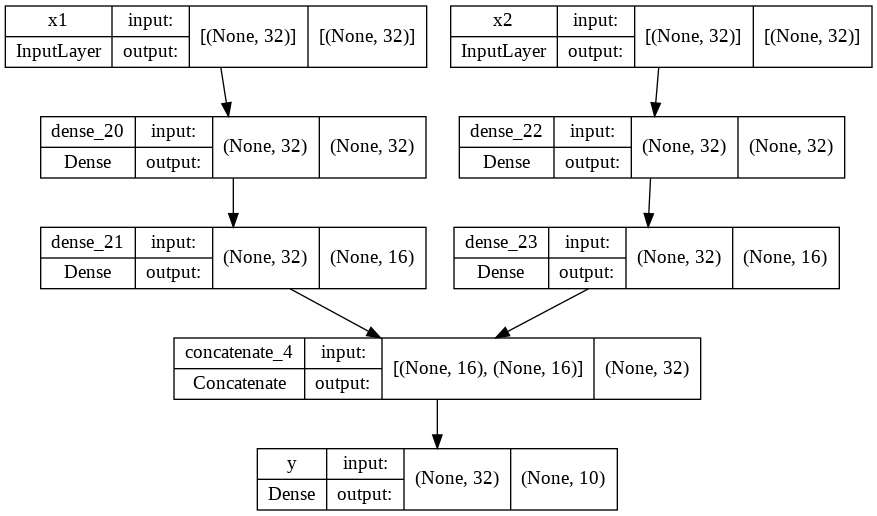

In [16]:
model = build_multi_input_model()
#model.summary()
utils.plot_model(model, show_shapes = True)

In [17]:
import numpy as np
# 가짜 데이터 생성 (100개)
x1_train = np.random.random(size = (100, 32))
x2_train = np.random.random(size = (100, 32))
y_train = np.random.randint(0, 9, size = (100,)) # sparse_crossentropy를 사용한다
print(y_train.shape)
for y in y_train[:5]:
    print(y)

(100,)
8
7
1
5
8


In [18]:
model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = 'rmsprop',)

In [21]:
model.fit([x1_train, x2_train], y_train, 
          epochs = 5, 
          batch_size = 4)

Epoch 1/5
25/25 [==============================] - 1s 1ms/step - loss: 2.2520
Epoch 2/5
25/25 [==============================] - 0s 1ms/step - loss: 2.1692
Epoch 3/5
25/25 [==============================] - 0s 1ms/step - loss: 2.1306
Epoch 4/5
25/25 [==============================] - 0s 1ms/step - loss: 2.1023
Epoch 5/5
25/25 [==============================] - 0s 1ms/step - loss: 2.0790


In [22]:
model.fit({'x1' : x1_train, 'x2' : x2_train}, y_train, 
          epochs = 5, 
          batch_size = 4)

Epoch 1/5
25/25 [==============================] - 0s 2ms/step - loss: 2.0548
Epoch 2/5
25/25 [==============================] - 0s 2ms/step - loss: 2.0312
Epoch 3/5
25/25 [==============================] - 0s 2ms/step - loss: 2.0111
Epoch 4/5
25/25 [==============================] - 0s 2ms/step - loss: 1.9854
Epoch 5/5
25/25 [==============================] - 0s 2ms/step - loss: 1.9647


### 7.1.3 다중 출력 모델

In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models, utils

# 고객에 대한 정보(카드값, 보험료, ...)가 들어왔을 때, 고객이 사는 지역, 성별, 나이 예측 
def build_multi_output_model():
    x = layers.Input(shape = 32, name = 'x')
    y = layers.Dense(32, activation = 'relu')(x)
    y = layers.Dense(16, activation = 'relu')(y)

    y_city = layers.Dense(10, activation = 'softmax', name = 'y_city')(y) # 10개 지역 (다중분류)
    y_gender = layers.Dense(1, activation = 'sigmoid', name = 'y_gender')(y) # 이진분류
    y_age = layers.Dense(1, name = 'y_age')(y)# 회귀
    return models.Model(inputs = x, outputs = [y_city, y_gender, y_age])

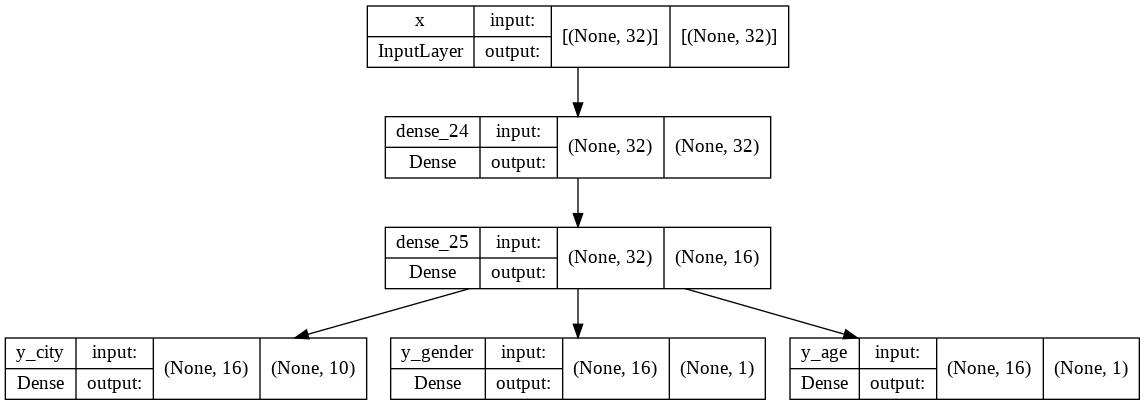

In [23]:
model = build_multi_output_model()
utils.plot_model(model, show_shapes = True)

In [37]:
import numpy as np
# 가짜 데이터 생성
x_train = np.random.random(size = (100, 32)) # 실수
y1_train = np.random.randint(0, 10, size = (100,)) # 10개 지역(다중클래스)
y2_train = np.random.randint(0, 2, size = (100,)) # 0 성별, 또는 1 
y3_train = np.random.random(size = (100,)) # 나이 -->  회귀

print(x_train.shape, y1_train.shape, y2_train.shape, y3_train.shape)

(100, 32) (100,) (100,) (100,)


In [39]:
model.compile(optimizer = 'rmsprop', # 문제 유형에 따라 달라지지 않음
              loss = ['sparse_categorical_crossentropy',
                      'binary_crossentropy',
                      'mse' ],  # 문제 유형에 따라 달라짐
               )

In [42]:
model.fit(x_train, [y1_train, y2_train, y3_train], 
          epochs = 4, 
          batch_size = 8
          )

Epoch 1/4
13/13 [==============================] - 0s 2ms/step - loss: 2.9067 - y_city_loss: 2.1876 - y_gender_loss: 0.6583 - y_age_loss: 0.0608
Epoch 2/4
13/13 [==============================] - 0s 2ms/step - loss: 2.9054 - y_city_loss: 2.1883 - y_gender_loss: 0.6567 - y_age_loss: 0.0604
Epoch 3/4
13/13 [==============================] - 0s 2ms/step - loss: 2.8942 - y_city_loss: 2.1814 - y_gender_loss: 0.6539 - y_age_loss: 0.0589
Epoch 4/4
13/13 [==============================] - 0s 2ms/step - loss: 2.8855 - y_city_loss: 2.1738 - y_gender_loss: 0.6526 - y_age_loss: 0.0591


In [41]:
model.fit( x_train, 
          {'y_city' : y1_train, 'y_gender' : y2_train,
           'y_age' : y3_train }, 
          epochs = 5, 
          batch_size = 4)

Epoch 1/5
25/25 [==============================] - 0s 2ms/step - loss: 2.9746 - y_city_loss: 2.2328 - y_gender_loss: 0.6757 - y_age_loss: 0.0662
Epoch 2/5
25/25 [==============================] - 0s 2ms/step - loss: 2.9572 - y_city_loss: 2.2205 - y_gender_loss: 0.6723 - y_age_loss: 0.0643
Epoch 3/5
25/25 [==============================] - 0s 2ms/step - loss: 2.9481 - y_city_loss: 2.2146 - y_gender_loss: 0.6693 - y_age_loss: 0.0642
Epoch 4/5
25/25 [==============================] - 0s 2ms/step - loss: 2.9355 - y_city_loss: 2.2062 - y_gender_loss: 0.6660 - y_age_loss: 0.0634
Epoch 5/5
25/25 [==============================] - 0s 2ms/step - loss: 2.9246 - y_city_loss: 2.1993 - y_gender_loss: 0.6630 - y_age_loss: 0.0622


나이 회귀 작업에 사용되는 평균 제곱 오차(MSE) 손실은 일반적으로 3~5 사이의 값을 가집니다. 반면에 이진 분류 작업에 사용되는 크로스엔트로피 손실은 0.1 정도로 낮습니다. 이런 환경에서 서로 다른 손실에 균형을 맞추려면 크로스엔트로피 손실에 가중치 10을 주고 MSE 손실에 가중치 0.25를 줄 수 있습니다.

In [43]:
model.compile(optimizer = 'rmsprop', # 문제 유형에 따라 달라지지 않음
              loss = ['sparse_categorical_crossentropy',
                      'binary_crossentropy',
                      'mse' ],  # 문제 유형에 따라 달라짐
              loss_weights = [0.1, 0.3, 1]
               )

In [44]:
model.fit(x_train, [y1_train, y2_train, y3_train], 
          epochs = 4, 
          batch_size = 8
          )

Epoch 1/4
13/13 [==============================] - 1s 2ms/step - loss: 0.4742 - y_city_loss: 2.1728 - y_gender_loss: 0.6493 - y_age_loss: 0.0621
Epoch 2/4
13/13 [==============================] - 0s 2ms/step - loss: 0.4619 - y_city_loss: 2.1696 - y_gender_loss: 0.6465 - y_age_loss: 0.0509
Epoch 3/4
13/13 [==============================] - 0s 2ms/step - loss: 0.4630 - y_city_loss: 2.1677 - y_gender_loss: 0.6426 - y_age_loss: 0.0535
Epoch 4/4
13/13 [==============================] - 0s 2ms/step - loss: 0.4612 - y_city_loss: 2.1625 - y_gender_loss: 0.6411 - y_age_loss: 0.0526


### 7.1.4 층으로 구성된 비순환 유향 그래프

함수형 API를 사용하면 다중 입력이나 다중 출력 모델뿐 아니라 내부 토폴로지가 복잡한 네트워크도 만들 수 있습니다. 케라스의 신경망은 층으로 구성된 어떤 비순환 유향 그래프도 만들수 있습니다. 

#### **인셉션 모듈**

인셉셥(inception)은 합성곱 신경망에서 인기 있는 네트워크 구조입니다. 일찍이 네트워크 안의 네트워크 구조에서 영감을 받아 2013~2014년에 크리스티안 세게디와 그의 구글 동료들이 만들었습니다.

> 1x1 합성곱의 목적

이미 알고 있듯이 합성곱은 입력 텐서에서 타일 주변의 패치를 추출하고 각 패치에 동일한 연산을 수행합니다. 이 경우는 추출된 패치가 하나의 타일로 이루어졌을 때입니다. 이 합성곱 연산은 모든 타일 벡터를 하나의 Dense 층에 통과시키는 것과 동일합니다. 즉 입력 텐서의 채널 정보를 혼합한 특성을 계산합니다. 공간 방향으로는 정보를 섞지 않습니다. 이런 11x1 합성곱은 인셉션 모듈의 특징입니다. 채널 방향의 특성 학습과 공간 방향의 특성 학습을 분리하는데 도움을 줍니다. 채널이 공간 방향으로 상관관계가 크고 채널 간에는 독립적이라고 가정하면 납득할 만한 전략입니다.

![](https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0207-01.PNG?raw=true)

In [54]:
def InceptionModule(x):
    a = layers.Conv2D(128, 1, strides = 2, padding = 'same', activation = 'relu')(x)
    
    b = layers.Conv2D(128, 1, strides = 1, padding = 'same', activation = 'relu')(x)
    b = layers.Conv2D(128, 3, strides = 2, padding = 'same', activation = 'relu')(b)
    
    c = layers.AvgPool2D(3, 2, padding = 'same')(x)
    c = layers.Conv2D(128, 3, 1, padding = 'same', activation = 'relu')(c)
    
    d = layers.Conv2D(128, 1, 1, padding = 'same', activation = 'relu')(x)
    d = layers.Conv2D(128, 3, 1, padding = 'same', activation = 'relu')(d)
    d = layers.Conv2D(128, 3, 2, padding ='same',activation = 'relu')(d)
    y = layers.concatenate([a,b,c,d], axis = 1)
    return y

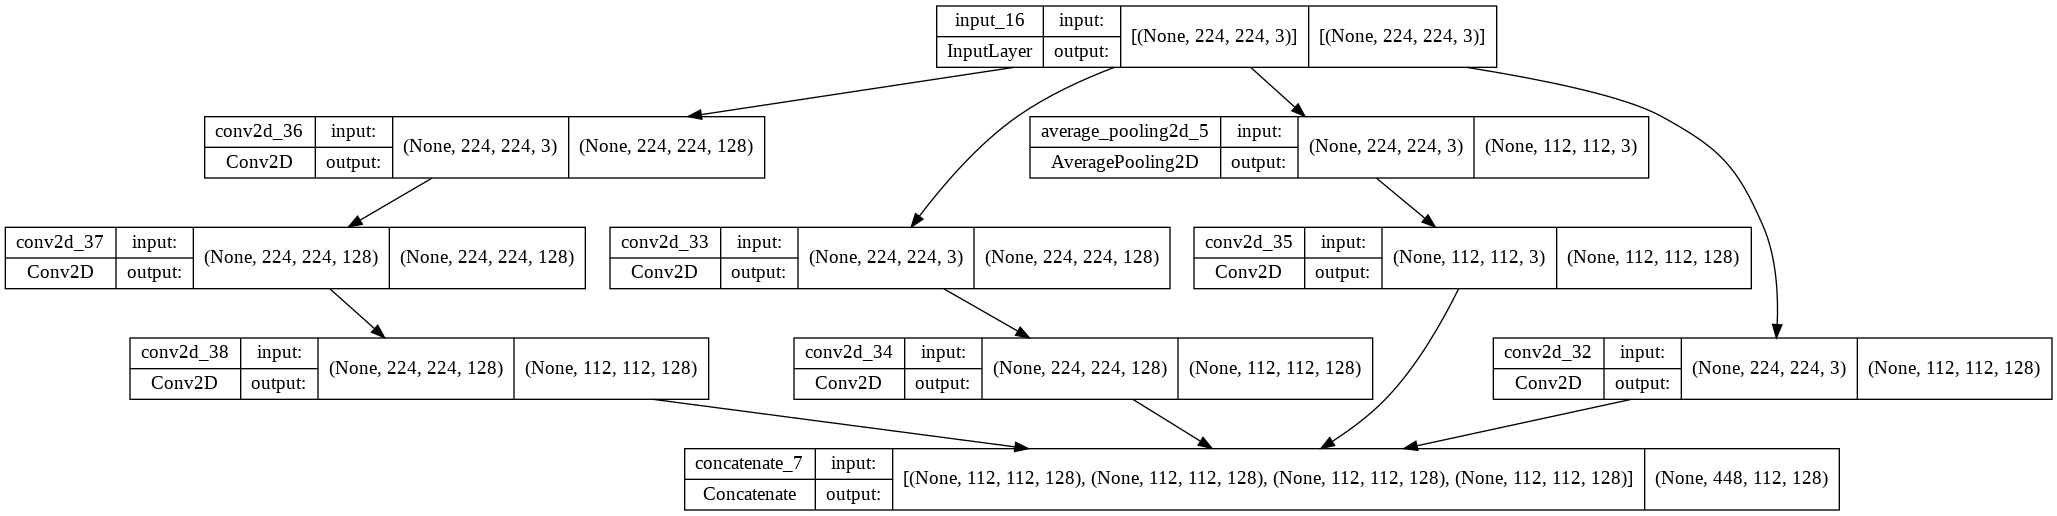

In [56]:
def build_Inception():
    x = layers.Input(shape = (224, 224, 3))
    y = InceptionModule(x)
    return models.Model(x, y)
model = build_Inception()
utils.plot_model(model, show_shapes = True)

#### **잔차 연결**

잔차연결(residual connection)은 엑셉션을 포함하여 2015년 이후 등장한 많은 네트워크 구조에 있는 그래프 형태의 네트워크 컴포넌트입니다. 2015년 후반 ILSVRC ImageNet경영 대회 우승 팀인 마이크로소프트의 허 등이 소개했습니다. 대규모 딥러닝 모델에서 흔히 나타나는 두가지 문제인 그래디언트 소실과 표현 병목을 해결했습니다.



In [47]:
def ResidualBlock(x):
    y = layers.Conv2D(128, 3, activation = 'relu', padding = 'same')(x)
    y = layers.Conv2D(128, 3, activation = 'relu', padding = 'same')(y)
    y = layers.Conv2D(128, 3, activation = 'relu', padding = 'same')(y)
    y = layers.add([y, x])
    return y

# conatenate vs. add
# 사진을 concate 하면 채널 1, 2,..
# 사진을 add 하면 말그대로 안에 숫자가 더해지게 된다. 

### 7.1.5 층 가중치 공유

함수형 API의 중요한 또 하나의 기능은 층 객체를 여러번 재사용할 수 있다는 것입니다. 

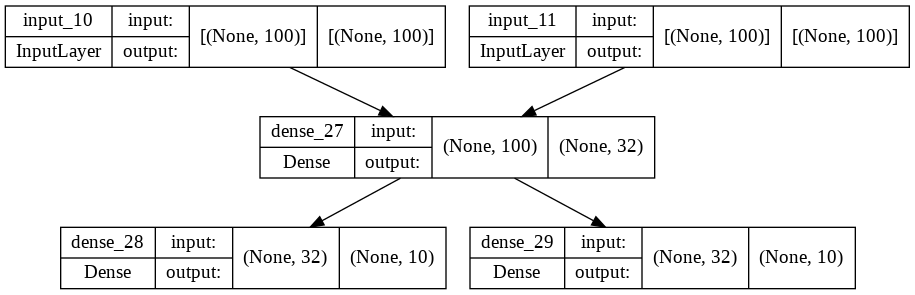

In [49]:
def shared_model():
    dense = layers.Dense(32) # 층이 생성

    x1 = layers.Input(shape = (100))
    y1 = dense(x1) # 이미 만들어놓은 층 사용
    y1 = layers.Dense(10)(y1)

    x2 = layers.Input(shape = (100))
    y2 = dense(x2) # 이미 만들어놓은 층 두번째 사용 -> 한번 학습할 때 같은 층에서 
    # 가중치 공유 
    y2 = layers.Dense(10)(y2)
    return models.Model([x1, x2], [y1, y2])

model = shared_model()
utils.plot_model(model, show_shapes = True)

### 7.1.6 층과 모델

함수형 API에서는 모델을 층처럼 사용할 수 있습니다. 모델을 하나의 '커다란 층'으로 생각해도 됩니다. 


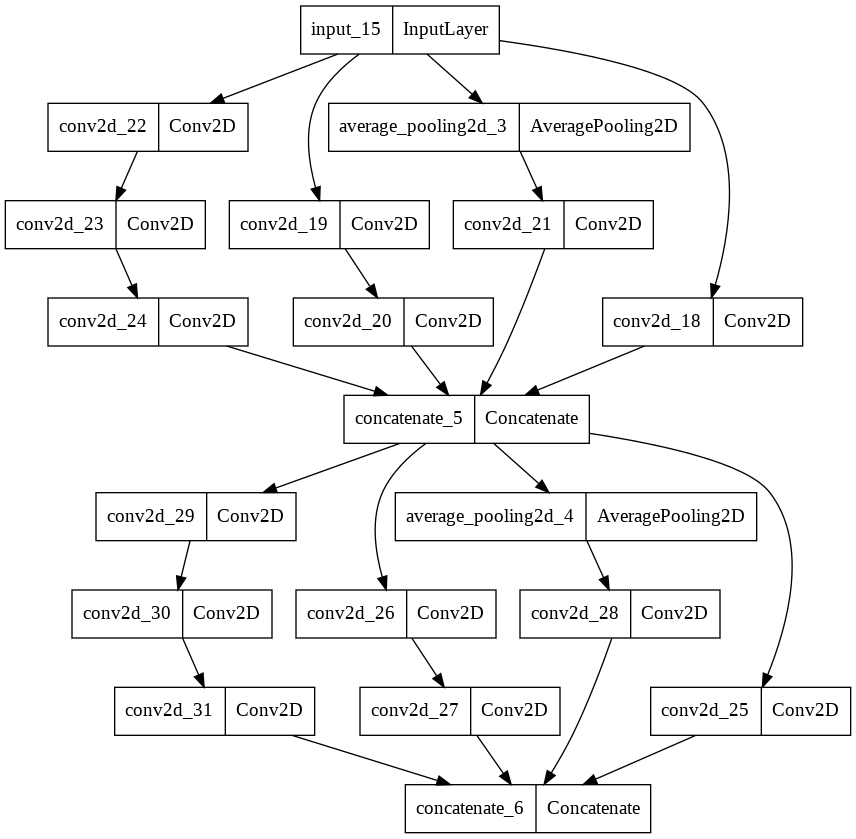

In [55]:
def build_Inception():
    x = layers.Input(shape = (224, 224, 3))
    y = InceptionModule(x)
    y = InceptionModule(y)
    return models.Model(x, y)
model = build_Inception()
utils.plot_model(model)

In [58]:
# 이미 구현된 모델 가져오기
# 기초되는 모델: base model / backbone model

base_model = tf.keras.applications.VGG16(weights = None, # 최적화된 학습 파라미터를 사용하지 않겠다. 
                                         # 전이학습: 최적화된 학습 파라미터 사용하는거
                                         include_top = True #
                                         )
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [59]:
base_model = tf.keras.applications.VGG16(weights = None, # 최적화된 학습 파라미터를 사용하지 않겠다. 
                                         # 전이학습: 최적화된 학습 파라미터 사용하는거
                                         include_top = False # 인풋 shape 정의 되지 않음 
                                         # 입력 이미지의 크기를 조절 가능
                                         )
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
base_model = tf.keras.applications.ResNet50(weights = None, 
                                         include_top = True 
                                         )
utils.plot_model(base_model, show_shapes = True)

### 7.1.7 추가 학습 : 인물 사진 분류하기


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, utils, layers

In [2]:
! gdown https://drive.google.com/u/0/uc?id=1t2qIgpWdWX_n5OC8P2ZiDfPIQ98NY_PB&export=download

Downloading...
From: https://drive.google.com/u/0/uc?id=1t2qIgpWdWX_n5OC8P2ZiDfPIQ98NY_PB
To: /content/celeba_small.npz
100% 174M/174M [00:00<00:00, 201MB/s]


In [3]:
celeba = np.load('/content/celeba_small.npz') # 여러 배열 압축
list(celeba.keys())

['train_images', 'train_labels', 'test_images', 'test_labels']

In [4]:
train_images = celeba['train_images']
train_labels = celeba['train_labels']
test_images = celeba['test_images']
test_labels = celeba['test_labels']
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(2000, 72, 59, 3) (2000, 2) (200, 72, 59, 3) (200, 2)


In [5]:
gender_dict = {0: 'Female', 1: 'Male'}
issmile_dict = {0: 'Not Smile', 1: 'Smile'}

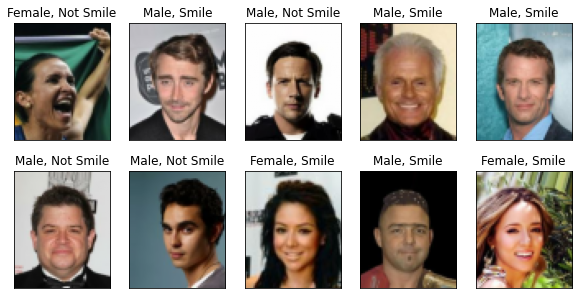

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i])
    gender, issmile = train_labels[i][0], train_labels[i][1]
    plt.title(f'{gender_dict[gender]}, {issmile_dict[issmile]}')
    plt.xticks([]); plt.yticks([])

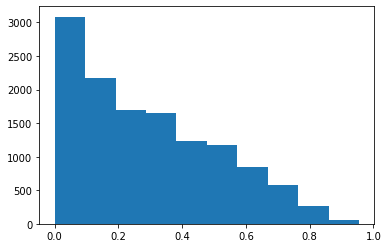

In [8]:
# X 데이터 전처리: 0 ~ 255 -> 0 ~ 1 정규화가 이미 되었다. 
_ = plt.hist(train_images[0].flatten())

In [21]:
x_train = train_images[:]
x_test = test_images[:]
x_train.shape, x_test.shape

((2000, 72, 59, 3), (200, 72, 59, 3))

In [22]:
# Y 데이터 전처리: y1, y2 : 0 또는 1 값을 가지도록 
y1_train = train_labels[:, 0]
y2_train = train_labels[:, 1]

y1_test = test_labels[:, 0]
y2_test = test_labels[:, 1]
y1_train.shape, y2_train.shape, y1_test.shape, y2_test.shape

((2000,), (2000,), (200,), (200,))

Text(0.5, 1.0, 'isSmile')

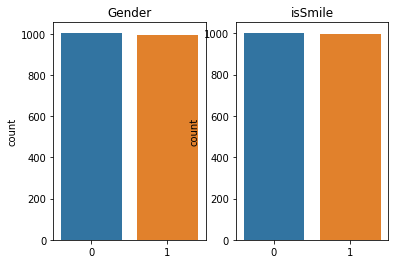

In [9]:
import seaborn as sns 
plt.subplot(121);sns.countplot(x = y1_train); plt.title('Gender')
plt.subplot(122);sns.countplot(x = y2_train); plt.title('isSmile')

In [13]:
# 실제로는 이정도 데이터셋의 이미지크기와 난이도 문제에는 이 방법 비추천 
base_model = tf.keras.applications.Xception(weights = None, # 최적화된 학습 파라미터를 사용하지 않겠다. 
                                         # 전이학습: 최적화된 학습 파라미터 사용하는거
                                         include_top = False #
                                         )
# utils.plot_model(base_model)

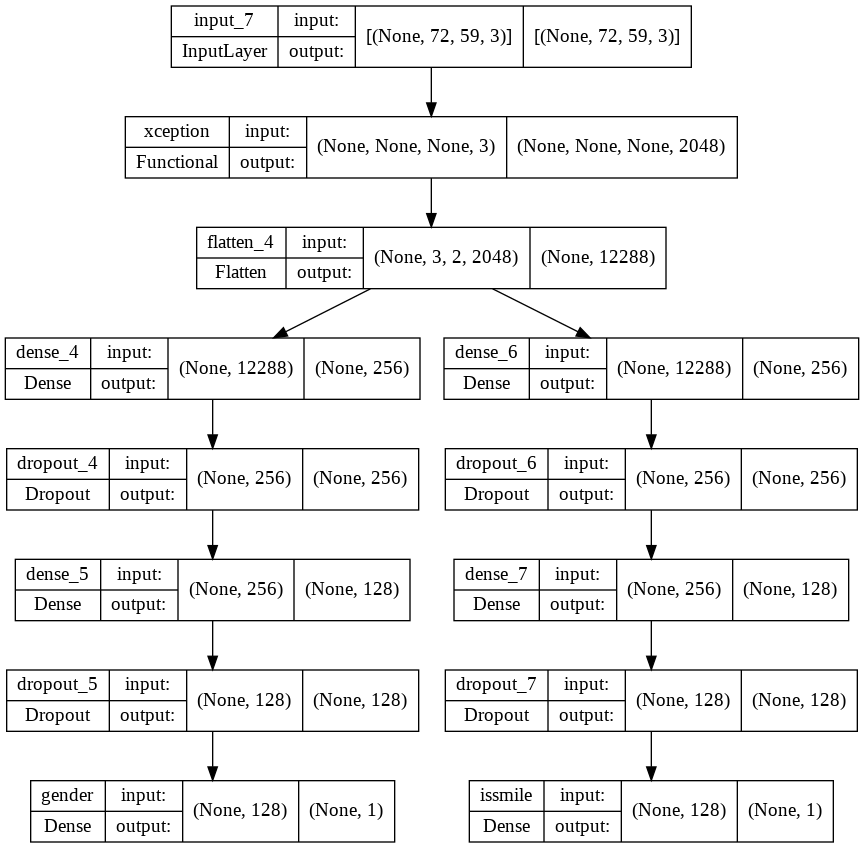

In [14]:
def build_model():
  # 보통 이미지 전처리에서 가로세로 동일하게 맞춰준다...
  x = layers.Input(shape=(72,59,3))
  y = layers.BatchNormalization()(x) # 정규화 층, 학습 파라미터가 존재
  y = base_model(x)
  y = layers.Flatten()(y)

  # 성별을 맞추는 가지
  y1 = layers.Dense(256, activation='relu')(y) 
  y1 = layers.Dropout(0.5)(y1)
  y1 = layers.Dense(128, activation='relu')(y1)
  y1 = layers.Dropout(0.5)(y1)
  y1 = layers.Dense(1, activation='sigmoid', name='gender')(y1) # 성별 : 이진분류
  # 웃고 있는지 판별하는 가지
  y2 = layers.Dense(256, activation='relu')(y)
  y2 = layers.Dropout(0.5)(y2)
  y2 = layers.Dense(128, activation='relu')(y2)
  y2 = layers.Dropout(0.5)(y2)
  y2 = layers.Dense(1, activation='sigmoid', name='issmile')(y2) # 성별 : 이진분류
  return models.Model(x, [y1, y2])
model = build_model()
utils.plot_model(model, show_shapes=True)

In [18]:
model.compile(loss = ['binary_crossentropy', 'binary_crossentropy'], # 두개 모두 이진분류
              optimizer = 'adam', # 학습률 - 얼마나 가중치를 업데이트 
              metrics = ['acc'])

In [ ]:
history = model.fit(x_train, [y1_train, y2_train],
                    validation_split = 0.2, # 훈련 데이터에서 일부분 검증용으로 사용
                    epochs = 30,
                    )

In [20]:
model.evaluate(x_test, [y1_test, y2_test])

7/7 [==============================] - 0s 27ms/step - loss: 1.1366 - gender_loss: 0.4728 - issmile_loss: 0.6639 - gender_acc: 0.8950 - issmile_acc: 0.7100


[1.1366422176361084,
 0.4727846384048462,
 0.6638575792312622,
 0.8949999809265137,
 0.7099999785423279]

In [25]:
# model 저장
model.save('model.h5')

## 7.2 케라스 콜백과 텐서보드를 사용한 딥러닝 모델 검사와 모니터링

이 절에서 훈련하는 동안 모델 내부에서 일어나는 일을 조사하고 제어하는 방법을 살펴보겠습니다. 대규모 데이터셋에서 model.fit() 으로 수십번의 에포크를 실행하는 것은 종이 비행기를 날리는 것과 조금 비슷합니다. 일단 손을 떠나면 종이 비행기 경로와 착률 지점을 제어할 방법이 없습니다. 앞으로 소개할 기법은  model.fit() 호출할 때 종이 비행기가 아닌 스스로 판단하고 결정하는 똑똑한 자동 드론으로 바꾸어 줄 것입니다. 

### 7.2.1 콜백을 사용하여 모델의 훈련 과정 제어하기

다음은 콜백을 사용하는 몇 가지 사례입니다. 
* 모델 체크포인트 저장: 훈련하는 동안 어떤 지점에서 모델의 현재 가중치를 저장합니다.
* 조기종료 : 검증 손실이 더 이상 향상되지 않을 때 훈련을 중지 합니다. (물론 훈련하는 동안 얻은 가장 좋은 모델을 저장합니다.)
* 훈련하는 동안 하이퍼 파라미터 값을 동적으로 조정합니다. : 옵티마이저의 학습률 같은 경우입니다. 
* 훈련과 검증 지표를 로그에 기록하거나 모델이 학습한 표현이 업데이트 될때마다 시각화 합니다. 

```
tf.keras.callbacks.ModelCheckpoint # 중간중간 모델을 자동 저장 
tf.keras.callbacks.EarlyStopping # 더이상 성능이 좋아지지 않으면 학습 종료
tf.keras.callbacks.ReduceLROnPlateau # 학습률 조정(보통, 초반에 적당한 값 -> 후반에 학습률을 줄여나간다)
tf.keras.callbacks.CSVLogger # 학습 정보가 csv파일 저장
```


In [ ]:
from tensorflow.keras import callbacks
model = build_model()
model.compile(loss = ['binary_crossentropy', 'binary_crossentropy'], # 두개 모두 이진분류
              optimizer = 'adam', # 학습률 - 얼마나 가중치를 업데이트 
              metrics = ['acc'])

ckp = callbacks.ModelCheckpoint(filepath = 'model.h5', # 모델 저장 경로
                                save_best_only = True, # 가장 성능이 좋은 모델만 저장 
                                monitor = 'val_loss',) # 어떤 값을 기준으로 성능 측정할 것인가
early = callbacks.EarlyStopping(monitor = 'val_loss',
                                patience = 10,
                                )
reduce_lr = callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                        patience =  5,
                                        factor = 0.1 # 얼마나 학습률을 줄일 것이냐 (1/10 만큼 줄이기 )
                                        )

tb = callbacks.TensorBoard(log_dir = 'my_log_dir',
                           )

history = model.fit(x_train, [y1_train, y2_train],
                    validation_split = 0.2, # 훈련 데이터에서 일부분 검증용으로 사용
                    epochs = 40,
                    callbacks = [ckp,] # 가장 좋은 모델만 획득하도록 #, early, reduce_lr, tb]
                    )


In [22]:
model.evaluate(x_test, [y1_test, y2_test]) # loss 기준 마지막 학습 후의 학습파라미터 세팅

7/7 [==============================] - 0s 28ms/step - loss: 1.8548 - gender_loss: 1.1275 - issmile_loss: 0.7273 - gender_acc: 0.9050 - issmile_acc: 0.9000


[1.8548403978347778,
 1.1275033950805664,
 0.7273369431495667,
 0.9049999713897705,
 0.8999999761581421]

In [ ]:
saved_model = models.load_model('model.h5')
saved_model.summary()

In [ ]:
saved_model.evaluate(x_test, [y1_test, y2_test]) # loss 기준 학습 중에 가장 좋은 학습파라미터 세팅

### 7.2.2 텐서보드 소개: 텐서플로의 시각화 프레임워크

In [15]:
%load_ext tensorboard

In [ ]:
log_dir = 'my_log_dir'
%tensorboard --logdir $log_dir

### 추론

In [26]:
y1_pred, y2_pred = model.predict(x_test)
y1_pred = y1_pred.flatten()
y2_pred = y2_pred.flatten()
print(y1_test.shape, y1_pred.shape)
print(y2_test.shape, y2_pred.shape)

(200,) (200,)
(200,) (200,)


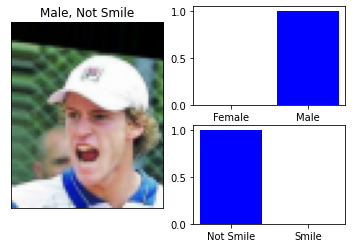

In [39]:
def inference(idx):
  plt.subplot(121)
  plt.imshow(x_test[idx])
  gender, issmile = y1_test[idx], y2_test[idx]
  plt.title(f'{gender_dict[gender]}, {issmile_dict[issmile]}')
  plt.xticks([]);plt.yticks([])

  plt.subplot(222)
  gender_pred = y1_pred[idx]
  if np.round(gender_pred) == gender: c='b'
  else: c='r'
  plt.bar(gender_dict.values(), [1-gender_pred, gender_pred], color=c)
 
  plt.subplot(224)
  issmile_pred = y2_pred[idx]
  if np.round(issmile_pred) == issmile: c='b'
  else: c='r'
  plt.bar(issmile_dict.values(), [1-issmile, issmile_pred], color=c)
  plt.show()

inference(5)

In [ ]:
for i in range(20, 40):
    inference(i)

In [10]:
x_train[0].shape

(72, 59, 3)

## 과제 1
---

이미지 인식 -> 다른 모델 (구현된거 말고, 본인이 직접 구현) 10 ~ 20 사이 레이어...

In [ ]:
def build_diff_model():
    x = layers.Input(shape=(72,59,3))

    # gender
    g = layers.Conv2D(32, 3, activation = 'relu', padding = 'same')(x)
    g = layers.BatchNormalization()(g)
    g = layers.Conv2D(64, 3, activation = 'relu', padding = 'same')(g)
    g = layers.BatchNormalization()(g)
    g = layers.Conv2D(64, 3, activation = 'relu', padding = 'same')(g)
    g = layers.BatchNormalization()(g)
    g = layers.Conv2D(128, 3, activation = 'relu', padding = 'same')(g)
    g = layers.BatchNormalization()(g)

    g = layers.Flatten()(g)

    g = layers.Dropout(0.5)(g)
    g = layers.Dense(64, activation = 'relu')(g)
    g = layers.Dropout(0.5)(g)
    g = layers.Dense(1, activation = 'sigmoid', name = 'diff_gender')(g)

    # smiling or not
    s = layers.Conv2D(32, 3, activation = 'relu', padding = 'same')(x)
    s = layers.BatchNormalization()(s)
    s = layers.Conv2D(64, 3, activation = 'relu', padding = 'same')(s)
    s = layers.BatchNormalization()(s)
    s = layers.Conv2D(64, 3, activation = 'relu', padding = 'same')(s)
    s = layers.BatchNormalization()(s)
    s = layers.Conv2D(128, 3, activation = 'relu', padding = 'same')(s)
    s = layers.BatchNormalization()(s)

    s = layers.Flatten()(s)

    s = layers.Dropout(0.5)(s)
    s = layers.Dense(64, activation = 'relu')(s)
    s = layers.Dropout(0.5)(s)
    s = layers.Dense(1, activation = 'sigmoid', name = 'diff_smile')(s)
    return models.Model(x, [g, s])
model2 = build_diff_model()
model2.summary()
#utils.plot_model(model1, show_shapes = True)

In [40]:
from tensorflow.keras import callbacks
model2.compile(loss = ['binary_crossentropy', 'binary_crossentropy'],
               optimizer = 'adam',
               metrics = ['acc'])
history2= model2.fit(x_train, [y1_train, y2_train], 
                    validation_split = 0.2, 
                    epochs = 30, 
                    )

Epoch 1/30
50/50 [==============================] - 7s 111ms/step - loss: 10.3098 - diff_gender_loss: 6.0972 - diff_smile_loss: 4.2126 - diff_gender_acc: 0.6187 - diff_smile_acc: 0.6000 - val_loss: 1.4377 - val_diff_gender_loss: 0.6866 - val_diff_smile_loss: 0.7511 - val_diff_gender_acc: 0.5300 - val_diff_smile_acc: 0.5575
Epoch 2/30
50/50 [==============================] - 5s 103ms/step - loss: 1.4193 - diff_gender_loss: 0.8269 - diff_smile_loss: 0.5924 - diff_gender_acc: 0.6769 - diff_smile_acc: 0.7231 - val_loss: 2.7998 - val_diff_gender_loss: 0.6870 - val_diff_smile_loss: 2.1128 - val_diff_gender_acc: 0.5300 - val_diff_smile_acc: 0.5250
Epoch 3/30
50/50 [==============================] - 5s 104ms/step - loss: 1.1672 - diff_gender_loss: 0.6606 - diff_smile_loss: 0.5066 - diff_gender_acc: 0.7094 - diff_smile_acc: 0.7613 - val_loss: 5.7286 - val_diff_gender_loss: 1.1170 - val_diff_smile_loss: 4.6116 - val_diff_gender_acc: 0.5000 - val_diff_smile_acc: 0.5250
Epoch 4/30
50/50 [=========

In [41]:
model2.evaluate(x_test, [y1_test, y2_test])

7/7 [==============================] - 0s 27ms/step - loss: 1.0070 - diff_gender_loss: 0.5103 - diff_smile_loss: 0.4967 - diff_gender_acc: 0.9150 - diff_smile_acc: 0.8850


[1.0070115327835083,
 0.5102697610855103,
 0.4967416822910309,
 0.9150000214576721,
 0.8849999904632568]

## 과제 2
---
* BatchNormalization

일반적인 gradient descent의 경우 한 번 gradient를 업데이트 할 때마다 모든 학습 데이터를 사용하는데, 이는 학습 데이터가 대용량일 때 처리 시간 등에 문제를 야기한다. 이런 한계를 마주해서 나온 것이 batch를 사용한 gradient descent, 즉 stochastic gradient descent 이다. sgd의 경우 한 번 gradient를 업데이트 할 대 마다 지정된 batch size 만큼의의 데이터만 사용하므로, 대용량 데이터의 현실적인 처리방법이 될 수 있다.  

하지만, 여기서 또 문제가 하나 발생하는데, 각각의 batch의 데이터 분포 차이가 발생할 수 있게된다는 점이다. 이 문제를 개선하고자 나온 개념이 batch normalization이다. 

batch normalization은 batch 별 존재할 수 있는 다양한 데이터 분포를 평균과 분산을 이용해 정규화, 즉 분포를 zero mean gaussian 형태(평균 = 0, 표준 편차 = 1)로 만든다 .  

![](https://gaussian37.github.io/assets/img/dl/concept/batchnorm/4.png)

출처: https://gaussian37.github.io/dl-concept-batchnorm/


In [42]:
# Internal Covariant Shift 개념 이해 필요 

# batch normalization은 학습 단계와 추론 단계에서 조금 다르게 적용되어야 한다고 한다. 